# EDA
I've split the EDA into 3 separate parts:
- Understanding the dataset
- Cleaning the dataset
- Feature analysis
    - Univariate
    - Multivariate

In [217]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv(r'C:\Users\marku\Desktop\ML\MLGit\datasets\insurance.csv')
df_copy=df.copy()

# Understanding the dataset

In [219]:
df.shape

(1338, 7)

The dataset has 1338 rows and 7 columns

In [220]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Name of each column.

In [221]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Indicates which datatype each column has
- int64: normal numeric value
- object: a categorical value

In [223]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


.describe() gives us information about how many values each column contains, the mean, standard deviation, and different percentiles. .describe() can only handle numeric values.
Doesn't seem like the dataset contains any missing value. (Will double check)
I cannot see any strange values.

# Cleaning the dataset

## Null-values

In [224]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset contains no null-values

## Encoding

In [225]:
df['sex'] = df['sex'].replace(['female', 'male'], [0,1])
df['smoker'] = df['smoker'].replace(['no', 'yes'], [0,1])
df['region'] = df['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'], [0,1,2,3])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Feature engineering

In [226]:
# Idea I got from a Titanic notebook, but looks like a common practice: https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier
def bins(df):
    df['AgeGroup'] = 0
    df.loc[df['age'] < 27.2, 'AgeGroup' ] = 0
    df.loc[(df['age'] >= 27.2) & (df['age'] < 36.4), 'AgeGroup'] = 1
    df.loc[(df['age'] >= 36.4) & (df['age'] < 45.6), 'AgeGroup'] = 2
    df.loc[(df['age'] >= 45.6) & (df['age'] < 54.8), 'AgeGroup'] = 3
    df.loc[df['age'] >= 54.8, 'AgeGroup'] = 4

    df['BMIGroup'] = 0
    df.loc[df['bmi'] < 23.394, 'BMIGroup' ] = 0
    df.loc[(df['bmi'] >= 23.394) & (df['bmi'] < 30.828), 'BMIGroup'] = 1
    df.loc[(df['bmi'] >= 30.828) & (df['bmi'] < 38.262), 'BMIGroup'] = 2
    df.loc[(df['bmi'] >= 38.262) & (df['bmi'] < 45.696), 'BMIGroup'] = 3
    df.loc[df['bmi'] >= 45.696, 'BMIGroup'] = 4

    return df
df = bins(df)

Here I've used a strategy called binning. The purpose of binning is to convert numerical values into categorical. This makes it easier to do Feature Correlation Analysis.

# Feature Analysis

## Univariate Analysis

Text(0.5, 1.0, 'Charges')

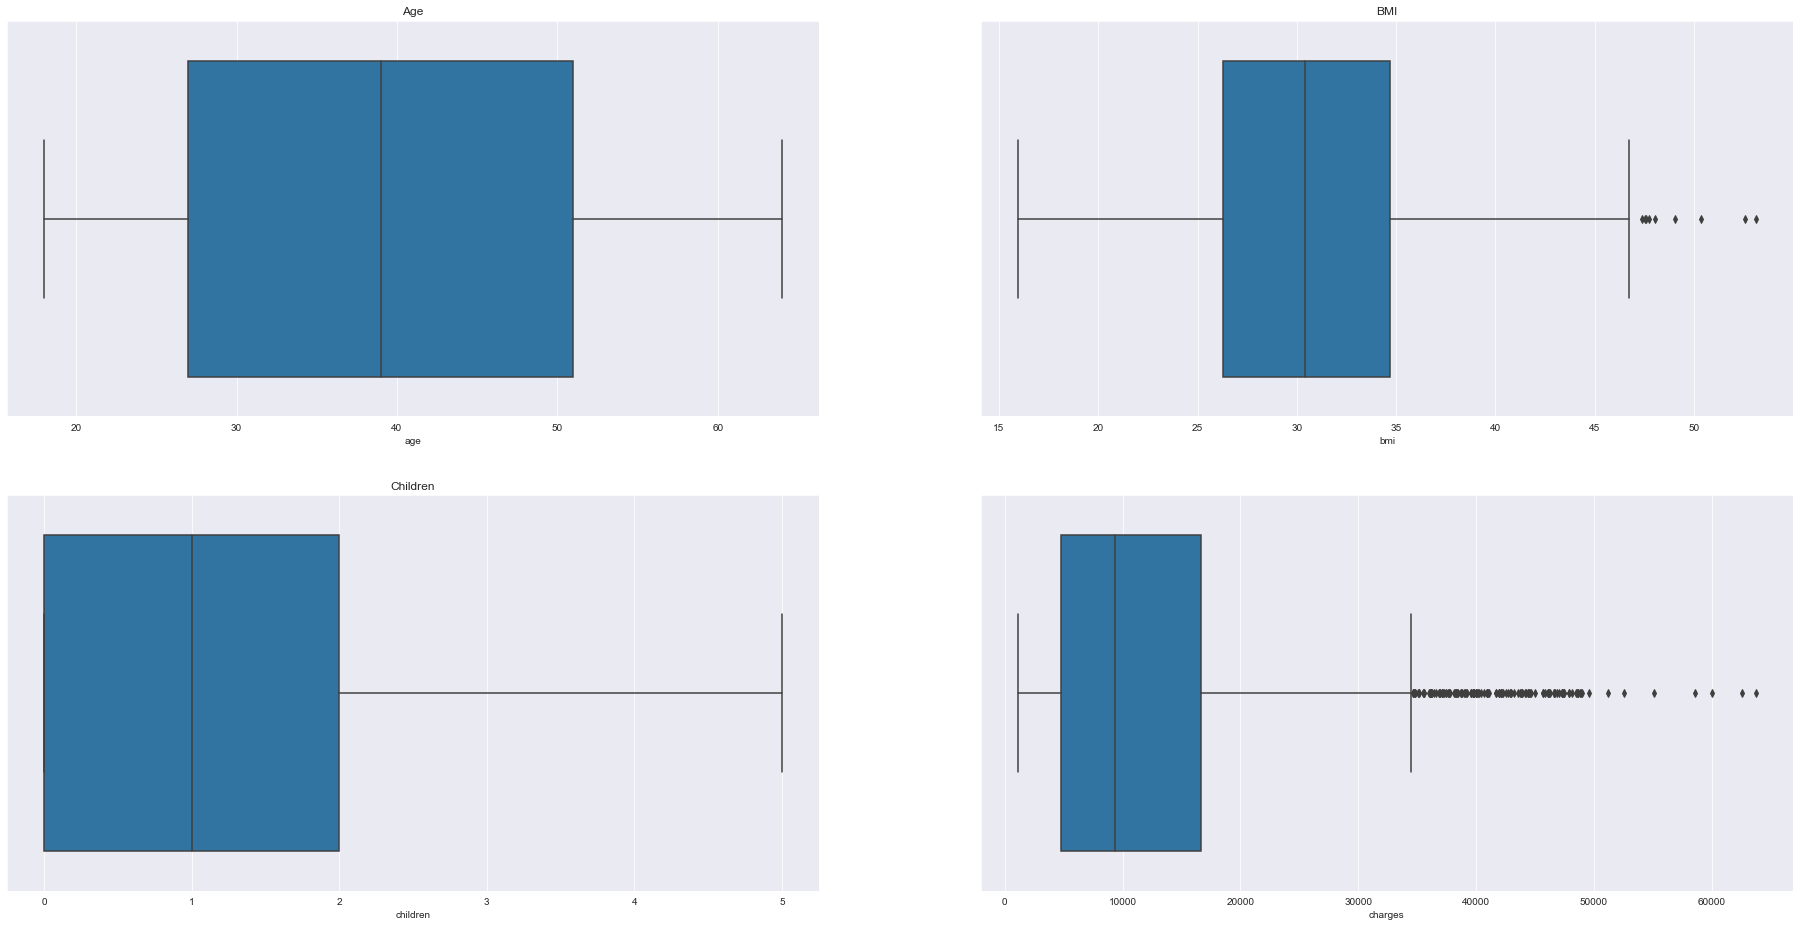

In [227]:
fig = plt.figure(figsize=(32,16))
gs = fig.add_gridspec(2,2)
plot1 = fig.add_subplot(gs[0,0])
plot2 = fig.add_subplot(gs[0,1])
plot3 = fig.add_subplot(gs[1,0])
plot4 = fig.add_subplot(gs[1,1])

sns.boxplot(ax=plot1,x=df['age'])
plot1.set_title('Age')

sns.boxplot(ax=plot2,x=df['bmi'])
plot2.set_title('BMI')

sns.boxplot(ax=plot3,x=df['children'])
plot3.set_title('Children')

sns.boxplot(ax=plot4,x=df['charges'])
plot4.set_title('Charges')

I've used these boxplots to show a features distribution
Age, children an BMI are pretty well distributed, however charges has many major outliers

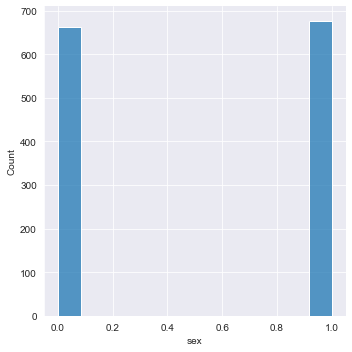

In [228]:
sns.displot(df['sex'])

The dataset is almost perfectly split with reagrds to sex

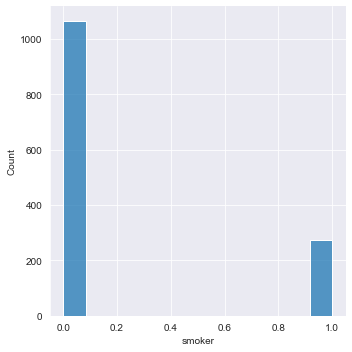

In [229]:
sns.displot(df['smoker'])

Smoker has a skewed distribution.
if the distribution had been any more skewed, this could have made some problems in regards to training a model.

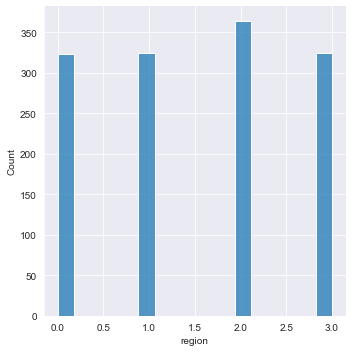

In [230]:
sns.displot(df['region'])

Region is almost perfectly split

## Multivariate Analysis

In [231]:
df[['smoker', 'charges']].groupby(['smoker'], as_index=False).mean()

,smoker,charges
0,0,8434.268298
1,1,32050.231832


Here you can see the mean charges for both smokers and none smokers. By the looks of it, smoking has the biggest correlation with charges. This is quite self-explanatory.

In [232]:
df[['BMIGroup', 'charges']].groupby(['BMIGroup'], as_index=False).mean().sort_values(by='charges', ascending=False)

,BMIGroup,charges
4,4,17289.421583
2,2,15790.802305
3,3,15258.426910
1,1,11554.830480
0,0,9503.486692


You can see a clear correlation between higher BMI and higher charges.

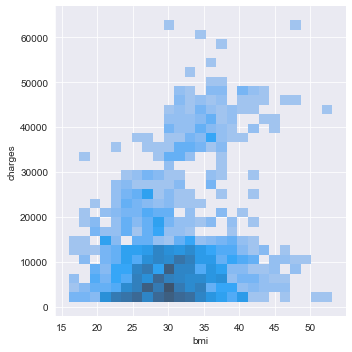

In [233]:
sns.displot(df, y=df['charges'], x=df['bmi'])

A good visualisation of charges compared to BMI. Here we can see that the higher the bmi, the higher the outliers get

In [234]:
df[['AgeGroup', 'charges']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='charges', ascending=False)

,AgeGroup,charges
4,4,18513.276227
3,3,15968.998082
2,2,13628.318836
1,1,10991.125921
0,0,9098.192248


The older groups pay way more on average than the younger

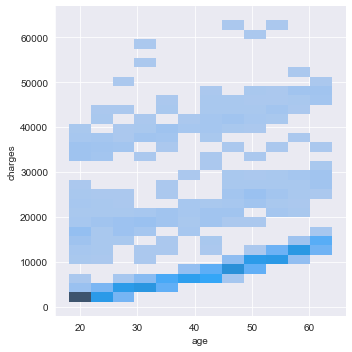

In [235]:
sns.displot(df, y=df['charges'], x=df['age'])

A visual representation of the correlation between age and charges. You can see that the minimum charges rises as you get older.

In [236]:
df[['sex', 'charges']].groupby(['sex'], as_index=False).mean().sort_values(by='charges', ascending=False)

,sex,charges
1,1,13956.751178
0,0,12569.578844


As you can see there is no big difference between the genders.

In [237]:
df[['region', 'charges']].groupby(['region'], as_index=False).mean().sort_values(by='charges', ascending=False)

,region,charges
2,2,14735.411438
0,0,13406.384516
1,1,12417.575374
3,3,12346.937377


(I don't really think region has a great correlation with charges, but I want to show that I'm capable of diving deeper into the data)
While most regions have a somewhat same mean, the southeast takes a massive lead. This can come from a handful of different reasons.
As we explored earlier especially BMI and smoking raised the price of treatment by a lot.

In [238]:
df[['region', 'BMIGroup']].groupby(['region'], as_index=False).mean().sort_values(by='BMIGroup', ascending=False)

,region,BMIGroup
2,2,1.832418
3,3,1.449231
1,1,1.289231
0,0,1.277778


Here you can see that the average BMIGroup for the region southeast is way higher than the rest. This is most likely the reason for the higher charges in this region.

In [239]:
df[['region', 'AgeGroup']].groupby(['region'], as_index=False).mean().sort_values(by='AgeGroup', ascending=False)

,region,AgeGroup
3,3,1.855385
0,0,1.848765
1,1,1.830769
2,2,1.813187



The mean age is exactly the same, so this isn't why southeast has a higher mean cost

In [240]:
df[['region', 'smoker']].groupby(['region'], as_index=False).mean().sort_values(by='smoker', ascending=False)

,region,smoker
2,2,0.250000
0,0,0.206790
1,1,0.178462
3,3,0.178462


Here we can see that southeast takes the lead with the number of smokers. Smoking combined with high BMI is the reason for the higher cost in this area

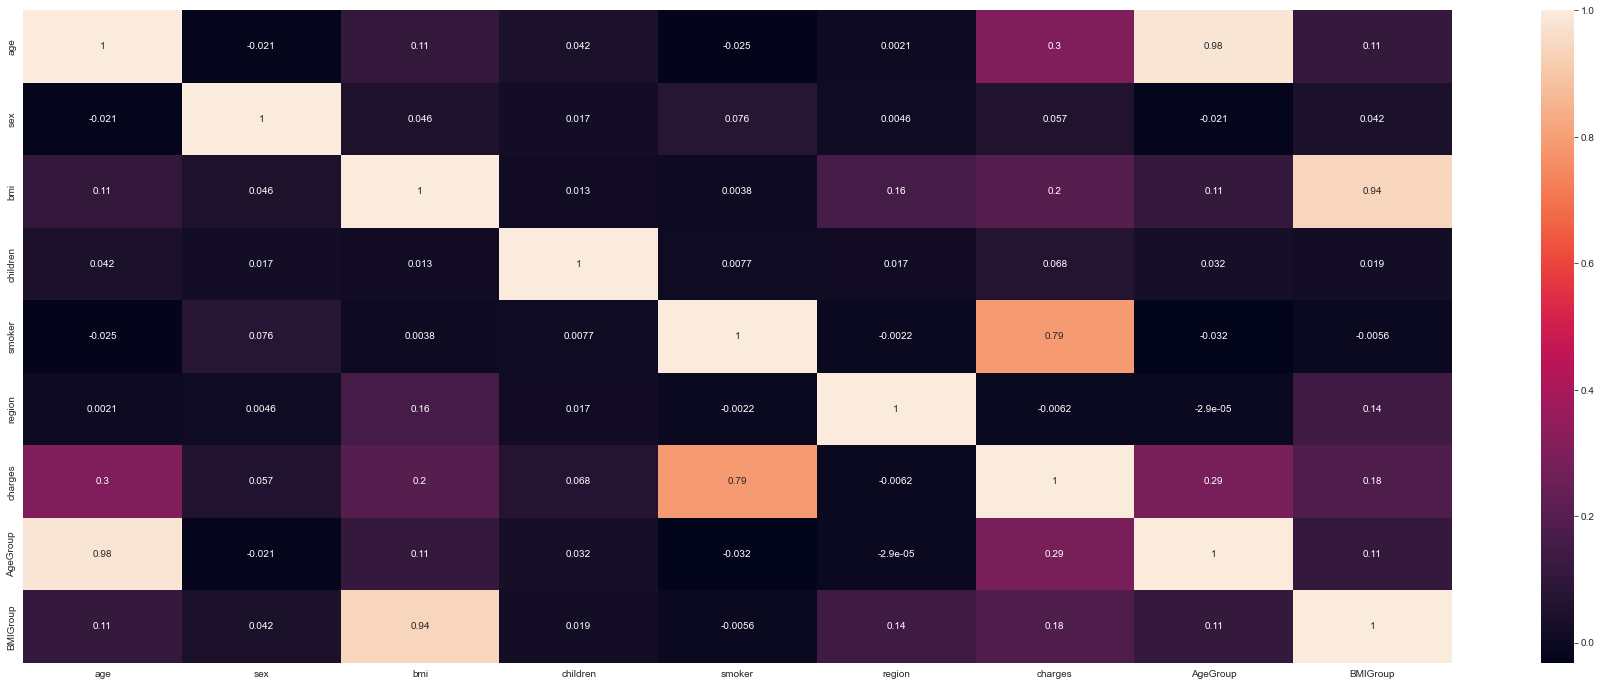

In [241]:
corr = df.corr()
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(corr, annot=True)

The heatmap confirms all of my hypothesis. We can see a good positive correlation between charges and: age, bmi and smoker.
As stated before, I don’t really think region has a great correlation with charges, but I want to show that I’m capable of diving deeper into the data. I thought it would have a much higher correlation than what we see in the heatmap.
In a large dataset it could be an idea to remove Sex, Region and Children from the dataset, to reduce the dimensionality

# The Final Dataset

In [242]:
# Dropping age and bmi due to the creation of AgeGroup and BMIGroup
df = pd.get_dummies(df)
df = df.drop(['age', 'bmi'], axis=1)
df

,sex,children,smoker,region,charges,AgeGroup,BMIGroup
0,0,0,1,3,16884.92400,0,1
1,1,1,0,2,1725.55230,0,2
2,1,3,0,2,4449.46200,1,2
3,1,0,0,1,21984.47061,1,0
4,1,0,0,1,3866.85520,1,1
...,...,...,...,...,...,...,...
1333,1,3,0,1,10600.54830,3,2
1334,0,0,0,0,2205.98080,0,2
1335,0,0,0,2,1629.83350,0,2
1336,0,0,0,3,2007.94500,0,1
